# Exploratory Data Analysis and Data Preprocessing
This notebook consists of exploratory data analysis and preprocessing for KC House dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
data = pd.read_csv("kc_house_data.csv")

## 1. Structure Investigation
In structure investigation, we inspect the general structure of the data. Eg: Number of rows, columns, data information, data types etc


In [3]:
#Print Head of data
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

From the data info, it can be seen that there are no null values present in the data.

In [5]:
print("Data type count:\n", pd.value_counts(data.dtypes))

Data type count:
 int64      15
float64     5
object      1
dtype: int64


<AxesSubplot:title={'center':'Unique Items per feature'}>

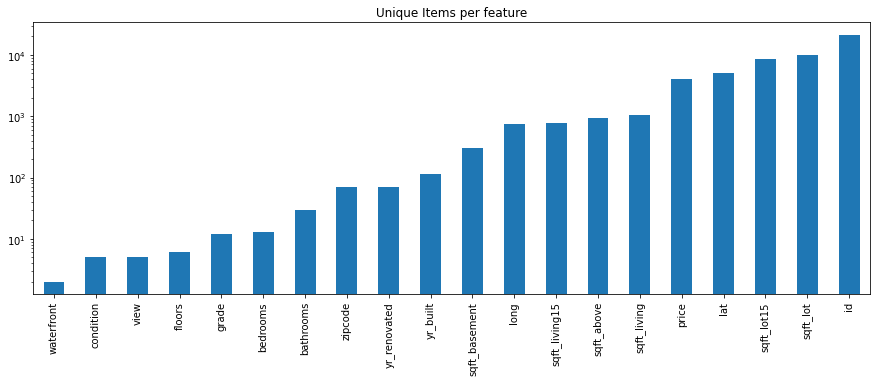

In [6]:
uniqueItems = data.select_dtypes(include="number").nunique().sort_values()
uniqueItems.plot.bar(logy=True, figsize=(15,5), title="Unique Items per feature")

Count of Unique features in each column is plotted above. The general informations about data and the binary, ordinal and continous feature vectors are seen in the dataset.
## 2. Quality Investigation
In quality investigation, we check for duplicates, missing information, outliers, and any unwanted entries etc

In [7]:
duplicates = data.duplicated().sum()
print("Found", str(duplicates), "Duplicates")

#NA values
print("NA Values:", data.isnull().values.any())

Found 0 Duplicates
NA Values: False


No duplicates or Null values present in data. As we already found out the zero values from data description, the zero values are interpreted as missing values.

In [8]:
#Print data description
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the above description of data, it can be seen that features like view, sqft_basement, yr_renovated has missing information.

Also, we can see a drastic change in number of bedrooms, bathrooms, sqft_living, sqft_above, sqft_basement, sqft_lot15 in the final quantile of the data. So taking a close look at their distribution.



In [9]:
data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15']].quantile([0, 0.2, 0.8, 0.98, 1])

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_lot15
0.00,0.0,0.00,290.0,290.0,0.0,651.00
0.20,3.0,1.50,1320.0,1120.0,0.0,4800.00
0.80,4.0,2.50,2730.0,2410.0,700.0,11094.20
0.98,5.0,3.75,4410.0,3970.0,1450.0,80188.28
1.00,33.0,8.00,13540.0,9410.0,4820.0,871200.00


From the above, we can see that lot of high values are there after the 98% quantile. So, Adding filters to remove these outliers

In [10]:
data = data[(data['bedrooms']<10) & (data['bathrooms']<5) & (data['sqft_living']<=10000) & (data['sqft_above']<=7000) & (data['sqft_lot15']<=100000) ]
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.120400e+04,2.120400e+04,21204.000000,21204.000000,21204.000000,2.120400e+04,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000,21204.000000
mean,4.620274e+09,5.332118e+05,3.364035,2.100241,2056.932749,1.196224e+04,1.492242,0.007263,0.226703,3.411668,7.640257,1767.524335,289.408414,1970.756980,83.864931,98078.568666,47.561353,-122.216874,1974.789662,9850.571166
std,2.874874e+09,3.410200e+05,0.897707,0.744671,874.048766,2.694073e+04,0.540575,0.084914,0.752967,0.651858,1.153377,793.656022,435.182519,29.437664,400.454054,53.636783,0.137754,0.138503,675.049098,10486.159581
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,651.000000
25%,2.143701e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.002000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.473975,-122.329000,1480.000000,5080.000000
50%,3.974150e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.538000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1974.000000,0.000000,98070.000000,47.572900,-122.235000,1830.000000,7560.000000
75%,7.345228e+09,6.400000e+05,4.000000,2.500000,2530.000000,1.037250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,560.000000,1996.000000,0.000000,98118.000000,47.678525,-122.129000,2350.000000,9916.250000
max,9.900000e+09,4.489000e+06,9.000000,4.750000,7710.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,6640.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,99316.000000


In [11]:
## Zero Values
columns = data.columns[:-1]
print("Total number of rows:", len(data))
for i in columns:
    print("Number of zero's in column", i, ":", (data[i]==0).sum())

Total number of rows: 21204
Number of zero's in column id : 0
Number of zero's in column date : 0
Number of zero's in column price : 0
Number of zero's in column bedrooms : 12
Number of zero's in column bathrooms : 10
Number of zero's in column sqft_living : 0
Number of zero's in column sqft_lot : 0
Number of zero's in column floors : 0
Number of zero's in column waterfront : 21050
Number of zero's in column view : 19174
Number of zero's in column condition : 0
Number of zero's in column grade : 0
Number of zero's in column sqft_above : 0
Number of zero's in column sqft_basement : 12855
Number of zero's in column yr_built : 0
Number of zero's in column yr_renovated : 20313
Number of zero's in column zipcode : 0
Number of zero's in column lat : 0
Number of zero's in column long : 0
Number of zero's in column sqft_living15 : 0


In [12]:
zeroValues = pd.DataFrame(['bedrooms', 'bathrooms', 'view', 'sqft_basement', 'yr_renovated'], columns=['feature'])
zeroValues['Zero Count'] = [(data[i]==0).sum() for i in zeroValues['feature']]
zeroValues['Missing information in percentage'] =  round(100 * zeroValues['Zero Count']/len(data), 2)
zeroValues.sort_values('Zero Count', ascending=False)

,feature,Zero Count,Missing information in percentage
4,yr_renovated,20313,95.80
2,view,19174,90.43
3,sqft_basement,12855,60.63
0,bedrooms,12,0.06
1,bathrooms,10,0.05


We can observe the missing information above.

**Imputing Missing Values and Creating new features**

In [13]:
# Removing 0 values in bathrooms and bedrooms
data = data.loc[(data['bedrooms']!=0) & (data['bathrooms']!=0)]

In [14]:
# Finding Age and Renovation age of properties
data['sold_year'] = data.date.apply(lambda x: int(x[0:4]))
data['age'] = data['sold_year'] - data['yr_built']
data['reno_age'] = np.abs(data['yr_renovated']- data['yr_built'])
data['reno_age'] = data.apply(lambda x: x['age'] if len(str(x['reno_age']))==4 else x['reno_age'], axis=1)
data['reno_flag']= data.yr_renovated.apply(lambda x: 1 if x!=0 else 0)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,age,reno_age,reno_flag
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,59,59,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,63,40,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,82,82,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,49,49,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,28,28,0


**Global view of numerical features**

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

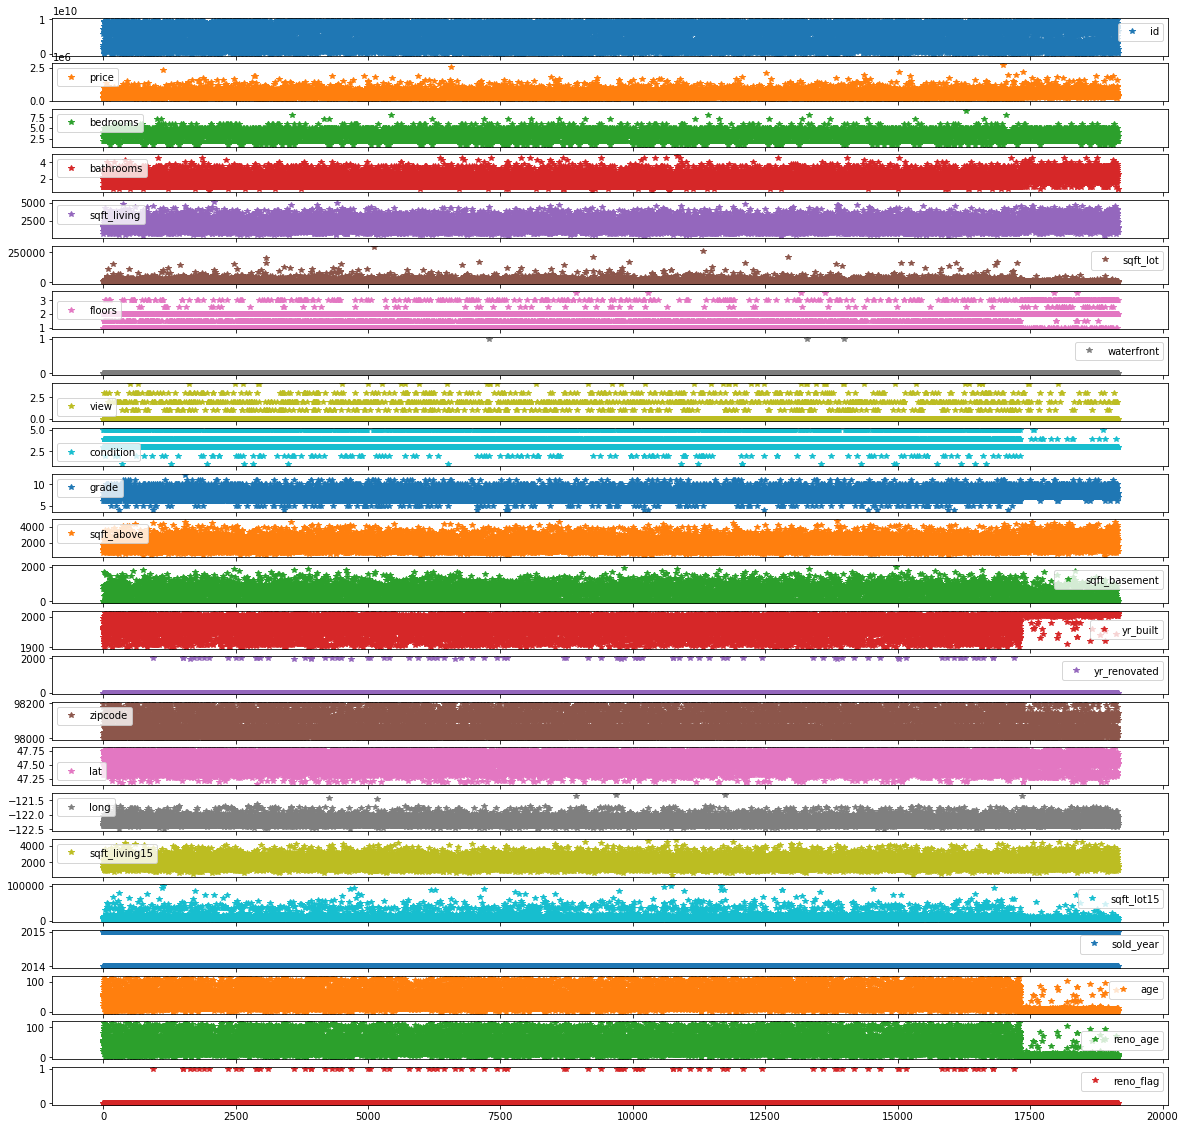

In [22]:
data.plot(lw=0, marker="*", subplots=True, figsize=(20, 20))

## 3. Content Investigation
Here, we analyse the content of the data. We go through features and tries to understand the relationship between them.

**Heatmap**

Plotting heatmap to visualise correlation

<AxesSubplot:>

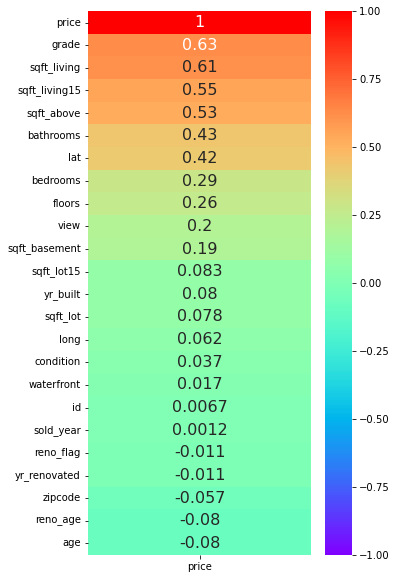

In [23]:
top_features = data.corr()[['price']].sort_values(by=['price'],ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

From the heatmap, we can see the correlations between the feature vectors.

 - We can see that sqft_living has highest correlation with the price. Also, grade, sqft_above, sqft_living15, and bathrooms are highly correlated with price.
 
Plotting these relations can bring a better understanding about the data distribution.

**Pairplot**

Plotting all variables against each other to visualise the data distribution

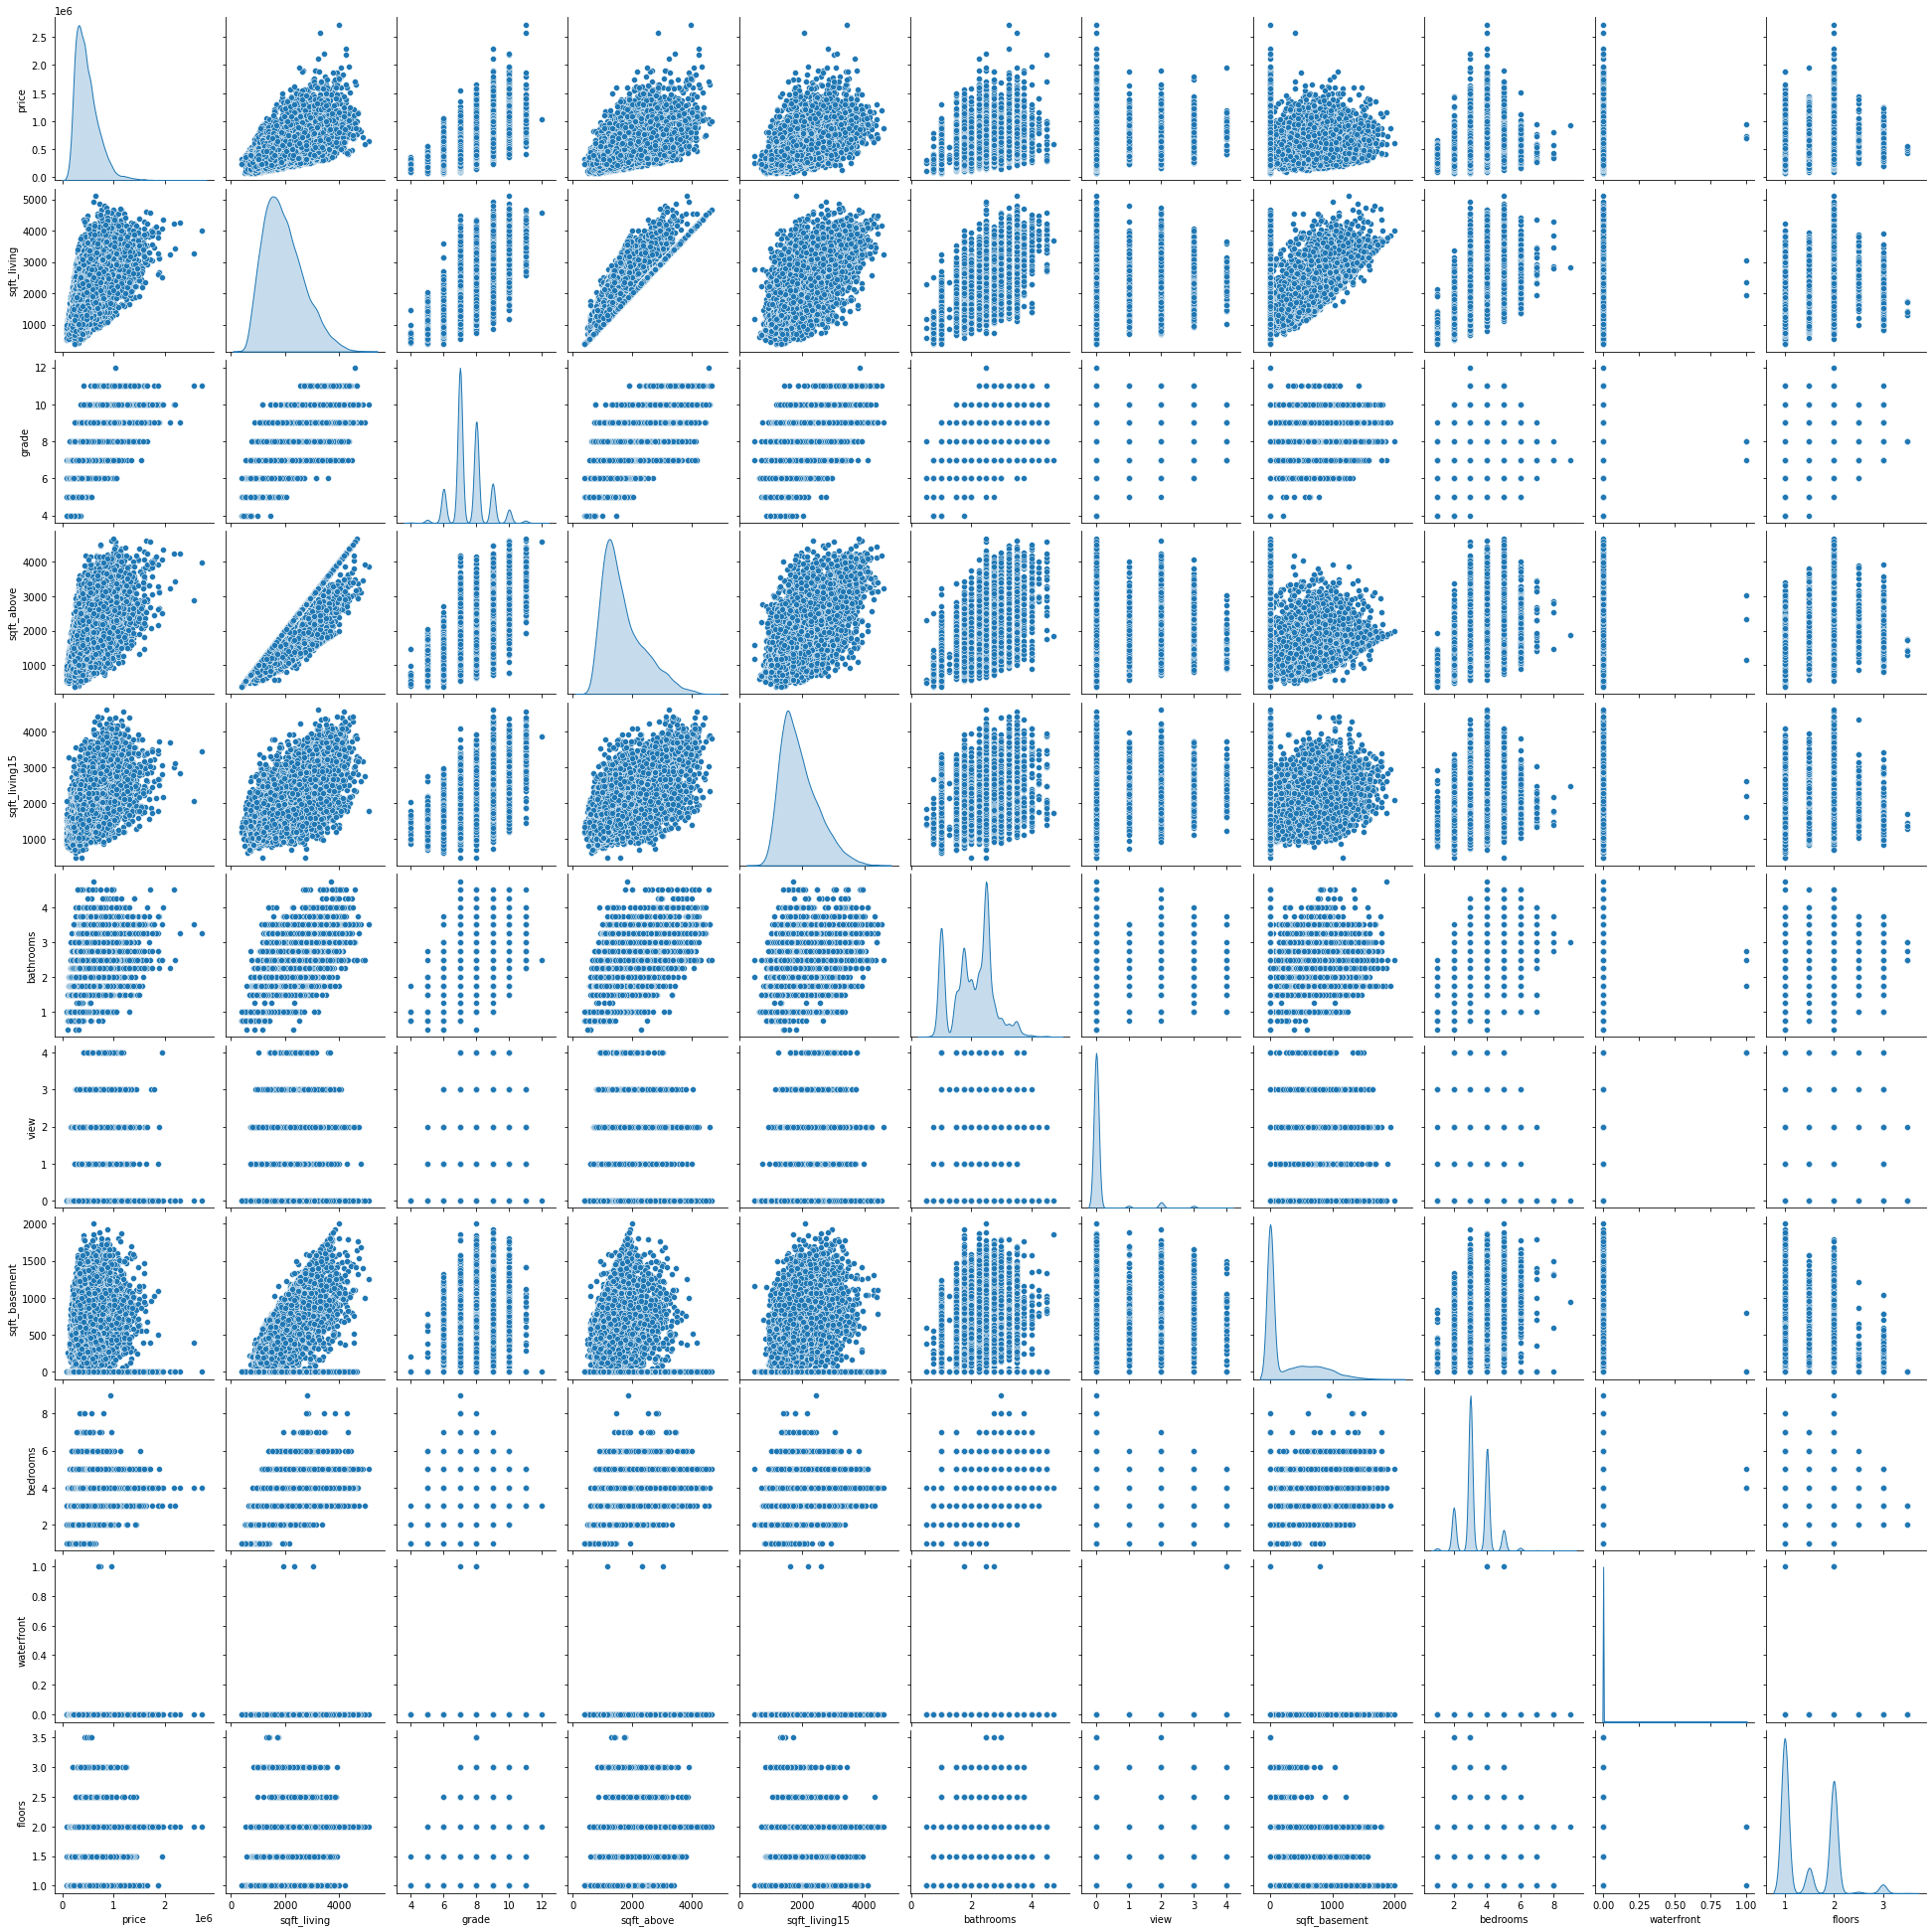

In [24]:
sns.pairplot(data[['price', 'sqft_living', 'grade' , 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'waterfront', 'floors']], diag_kind='kde')

In [25]:
#Function to plot data
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='price', data=data, ax=ax[0])
        sns.countplot(data[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='price', data=data, ax=ax[0])
        sns.distplot(data[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')

C:\Users\jishn\Anaconda3\envs\comp534\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


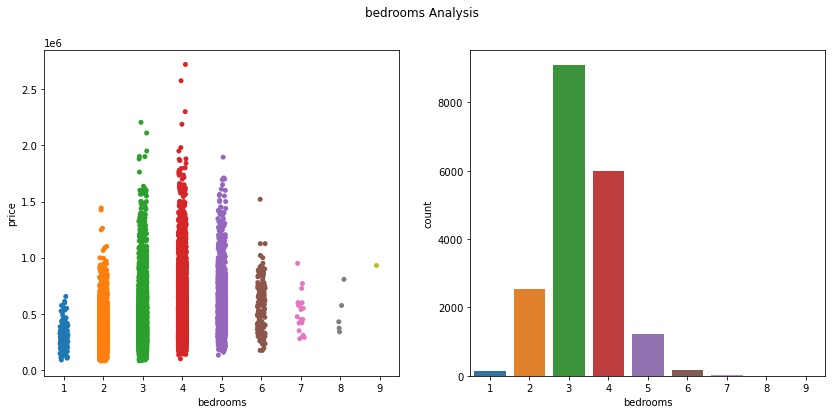

In [26]:
plot_data('bedrooms', True)

C:\Users\jishn\Anaconda3\envs\comp534\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


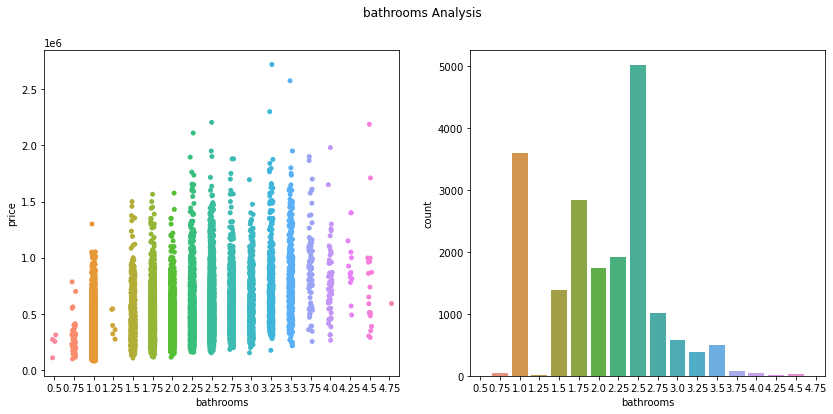

In [27]:
plot_data('bathrooms', True)

C:\Users\jishn\Anaconda3\envs\comp534\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


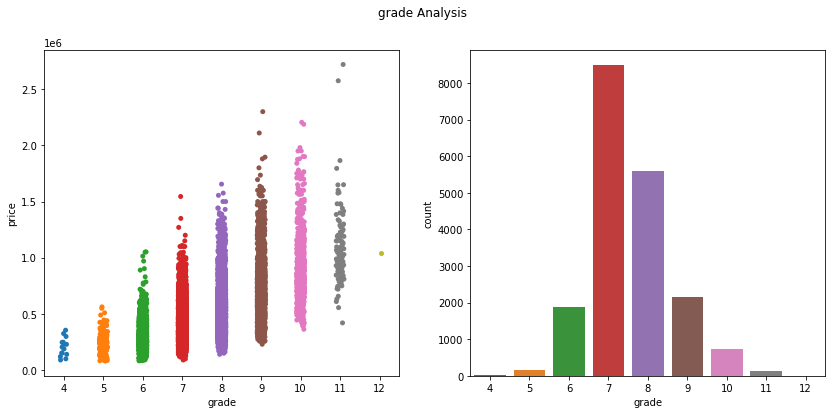

In [28]:
plot_data('grade', True)

## Save Clean Data

In [30]:
#Drop insignificant features
data.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sold_year'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age,reno_age,reno_flag
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,59,0
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,82,0
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,49,0
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,28,0
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,2238,6819,19,19,0


In [31]:
data.to_csv("clean_kcHouse.csv", index=False)